In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library('googlesheets4')
gs4_deauth()

In [3]:
read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY') |> head()

✔ Reading from gapminder.

✔ Range Africa.



country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
Algeria,Africa,1977,58.014,17152804,4910.417


In [26]:
regions = c('Africa', 'Americas', 'Asia', 'Europe', 'Oceania')

read_region = function(region) {
    local_gs4_quiet()
    read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY', sheet = region)
}

gapminder_all_regions = map_dfr(regions, read_region)

gapminder_all_regions |> head()

country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
Algeria,Africa,1977,58.014,17152804,4910.417


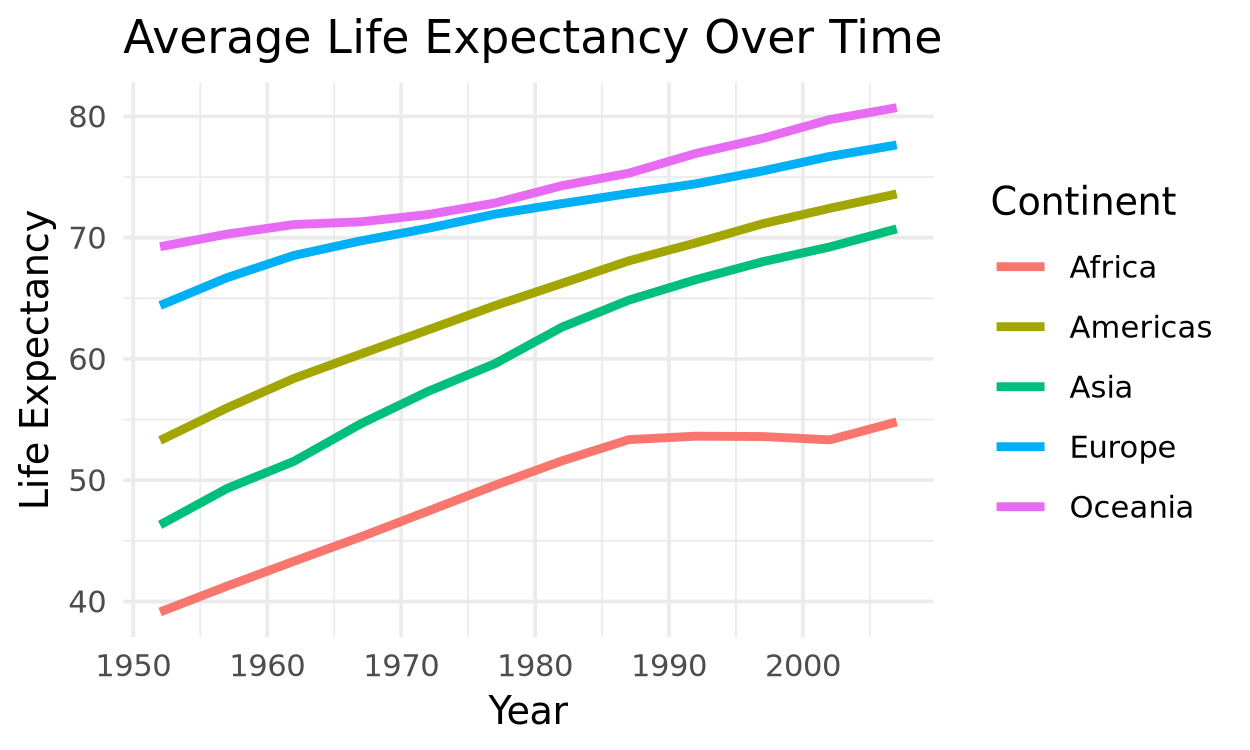

In [44]:
options(repr.plot.width=5, repr.plot.height=3)

ggplot(gapminder_all_regions, aes(x = year, y = lifeExp, color = continent)) +
  stat_summary(fun = mean, geom = "line", size = 1.2) +
  labs(title = "Average Life Expectancy Over Time",
       x = "Year",
       y = "Life Expectancy",
       color = "Continent") +
  theme_minimal()

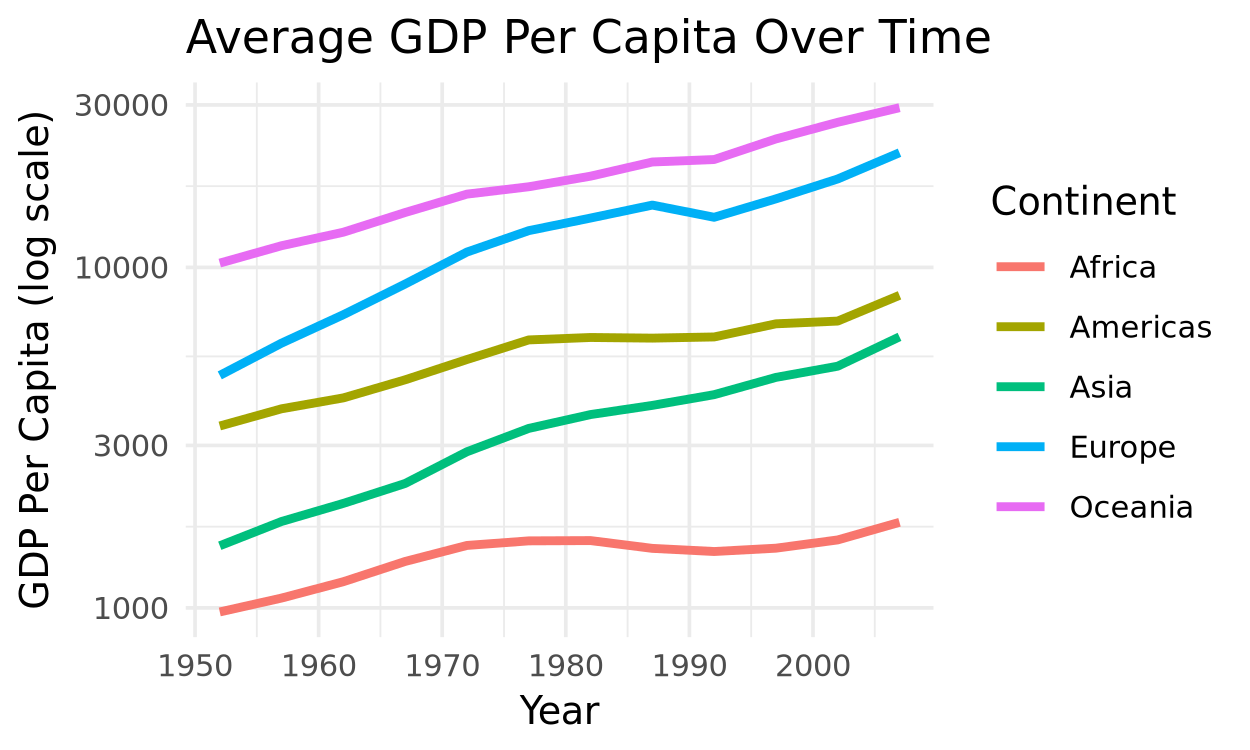

In [45]:
ggplot(gapminder_all_regions, aes(x = year, y = gdpPercap, color = continent)) +
  stat_summary(fun = mean, geom = "line", size = 1.2) +
  scale_y_log10() +
  labs(title = "Average GDP Per Capita Over Time",
       x = "Year",
       y = "GDP Per Capita (log scale)",
       color = "Continent") +
  theme_minimal()

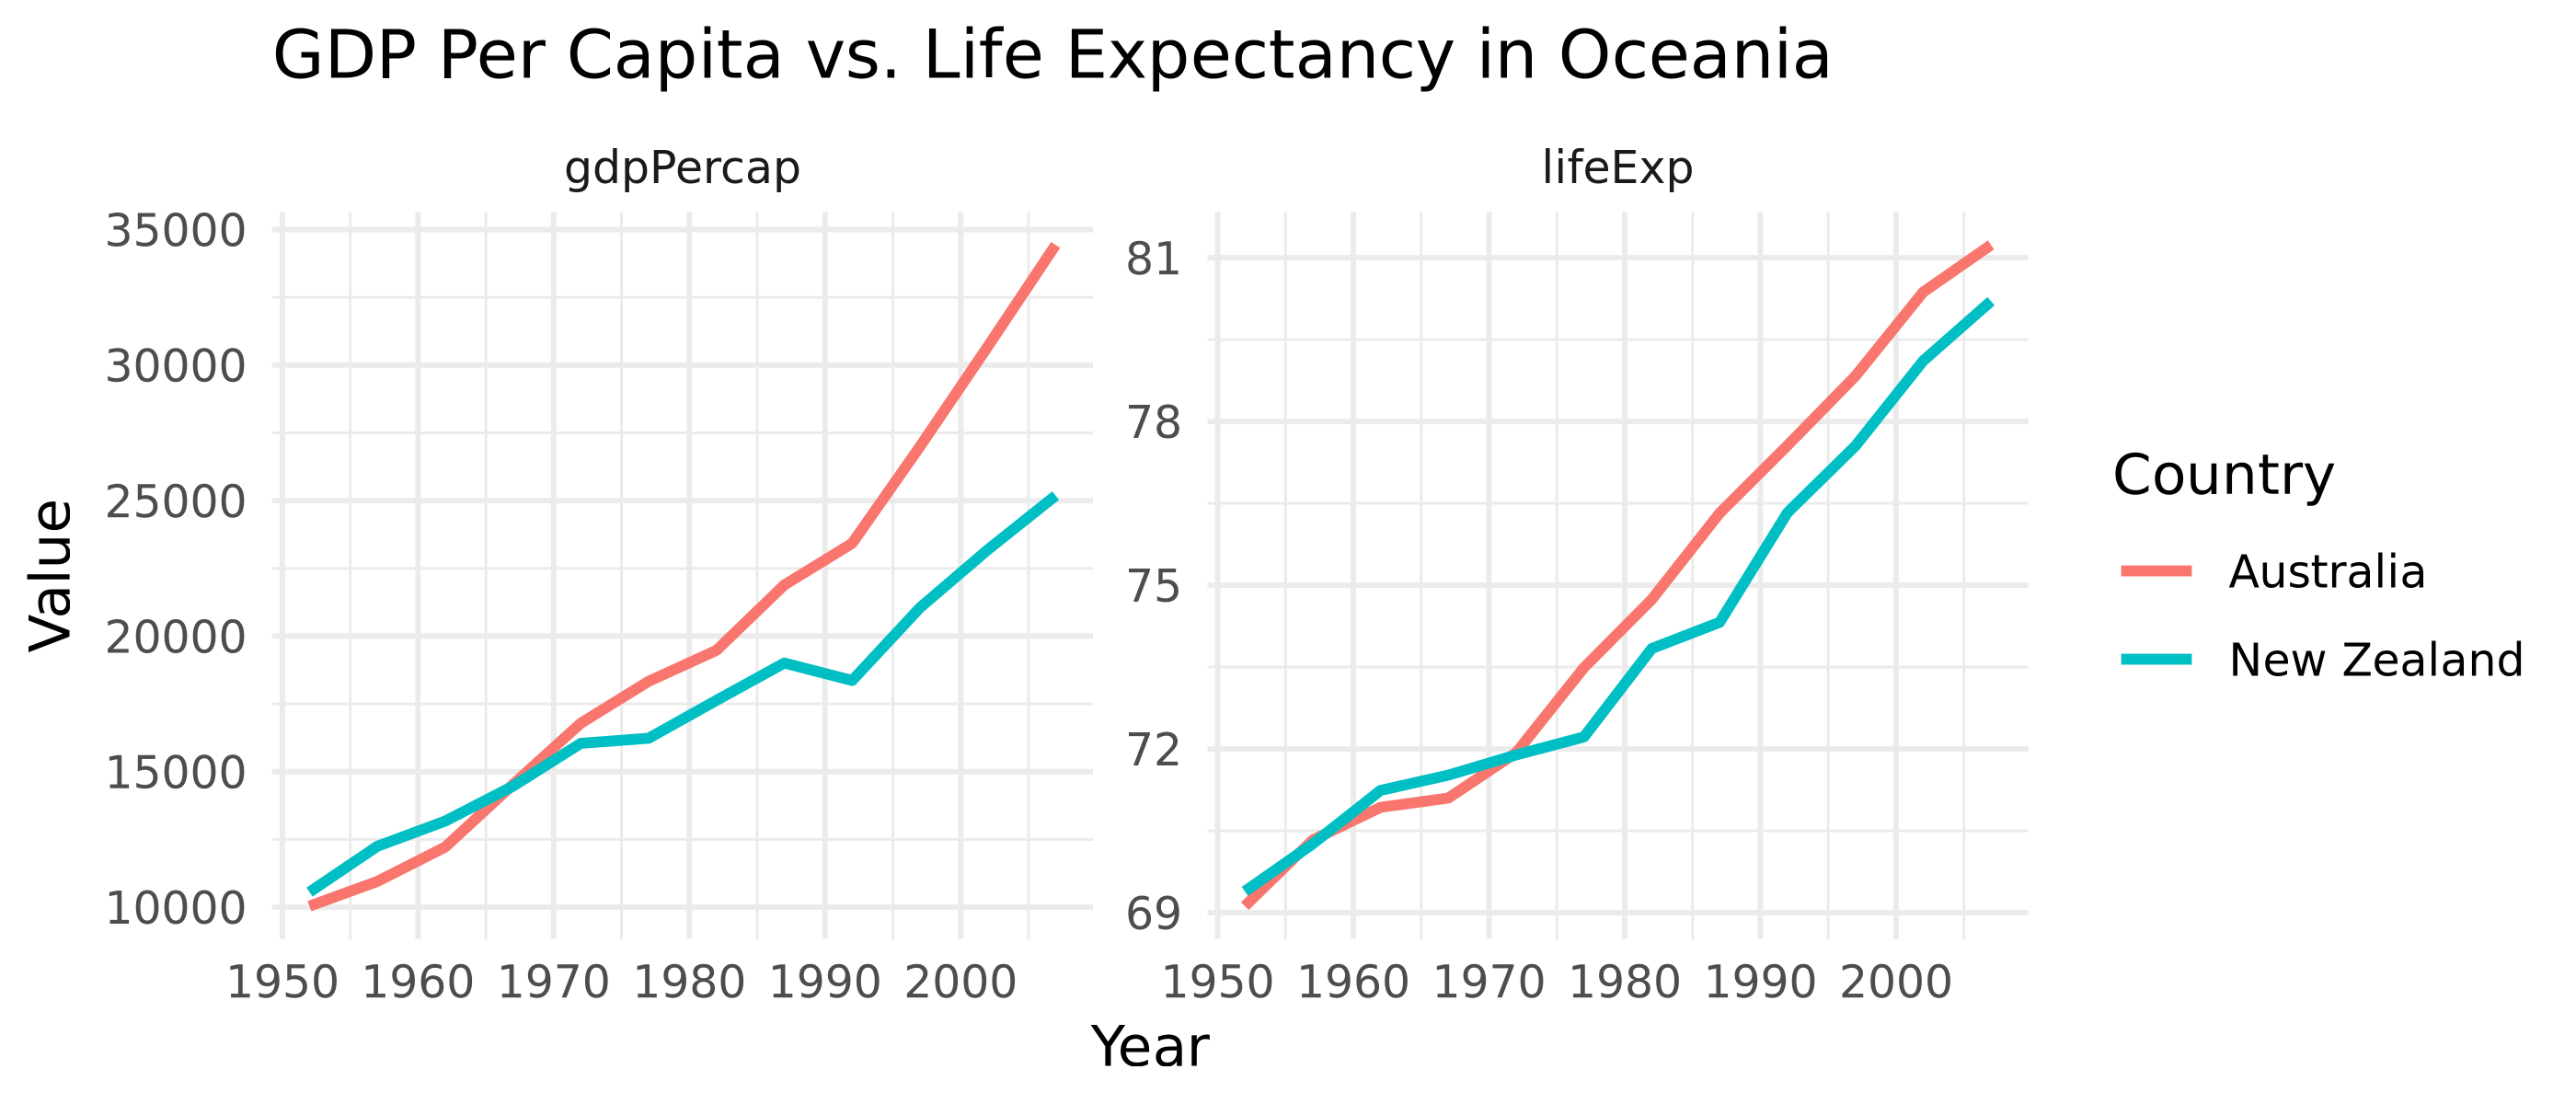

In [49]:
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=400)

oceania_long <- oceania_data %>%
  pivot_longer(cols = c(gdpPercap, lifeExp), names_to = "metric", values_to = "value")

ggplot(oceania_long, aes(x = year, y = value, color = country, group = country)) +
  geom_line(size = 1) +
  facet_wrap(~ metric, scales = "free_y") +
  labs(title = "GDP Per Capita vs. Life Expectancy in Oceania",
       x = "Year",
       y = "Value",
       color = "Country") +
  theme_minimal()

Analysis: 

The first graph displays the average life expectancy from the years 1950-2000 within each continent. For all continents, the life expectancy increases over time. By the year 2000, Oceania had the highest life expectancy compared to the other continents reaching ~78 years of age. Europe closely followed Oceania's trend just being slightly under and reaching a life expectancy of 76 years of age by the year 2000. Out of all continents,  the lowest average life expectancy over time was seen in Africa. The second figure demonstrates the trends in GDP per capita across the continents. We see similar trends with GDP per capita as with avg. life expectancy in each continent. 

For instance, Oceania showed the greatest average GDP per capita over the years with Europe following close behind. The lowest was Africa's GDP trend. This signifies a strong correlation between life expectancy and GDP per capita. People live longer in places with a higher GDP per capita because a higher per capita GDP generally indicates a higher standard of living, meaning better access to healthcare, sanitation, nutrition, and other factors. Hence these areas tend to have longer life expectancies due to improved health infrastructure and preventative measures enabled by their higher economic output per person. Further analysis within Oceania showed that Australia specifically had the highest GDP per capita and avg. life expectancy over time compared to New Zealand. This means that Australia had a greater contribution towards Oceania's overall estimates of life expectancy and GDP per capita as seen in first two figures.     